A case study on heart disease prediction 


### Importing Packages to train, build, and testing the models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Loading Dataset which is extracted from kaggle

In [3]:
df=pd.read_csv('/content/gdrive/MyDrive/heart1234.csv')
#df.FastingBS=df.FastingBS.astype('object')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### DATA EXPLORATORY ANALYSIS

In [4]:
df.isna().sum() 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.describe() #describes the features and attributes

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.info() #it will show brief information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
df.duplicated().value_counts() #it checks whether null values are present or not

True     723
False    302
dtype: int64

In [8]:
df.select_dtypes('object').columns #it shows the column names and type of those in the given dataset

Index([], dtype='object')

In [9]:
def suplots(columns,main,norm=True):  #   Function to create subplots of heatmaps between all categories and one main feature
    i=0
    plt.figure(figsize=(25,10))
    for t in columns:
        # Set Location
        plt.subplot(2,4,i+1)
        # Plot
        sns.heatmap(pd.crosstab(df[columns[i]],df[main],normalize=norm),annot=True,fmt="0.2f")
        # Title
        # plt.title(columns[i])
        #Rotate Y values
        plt.yticks(rotation=0)
        i+=1
  
suplots(df.select_dtypes('object').columns,'target')

<Figure size 1800x720 with 0 Axes>

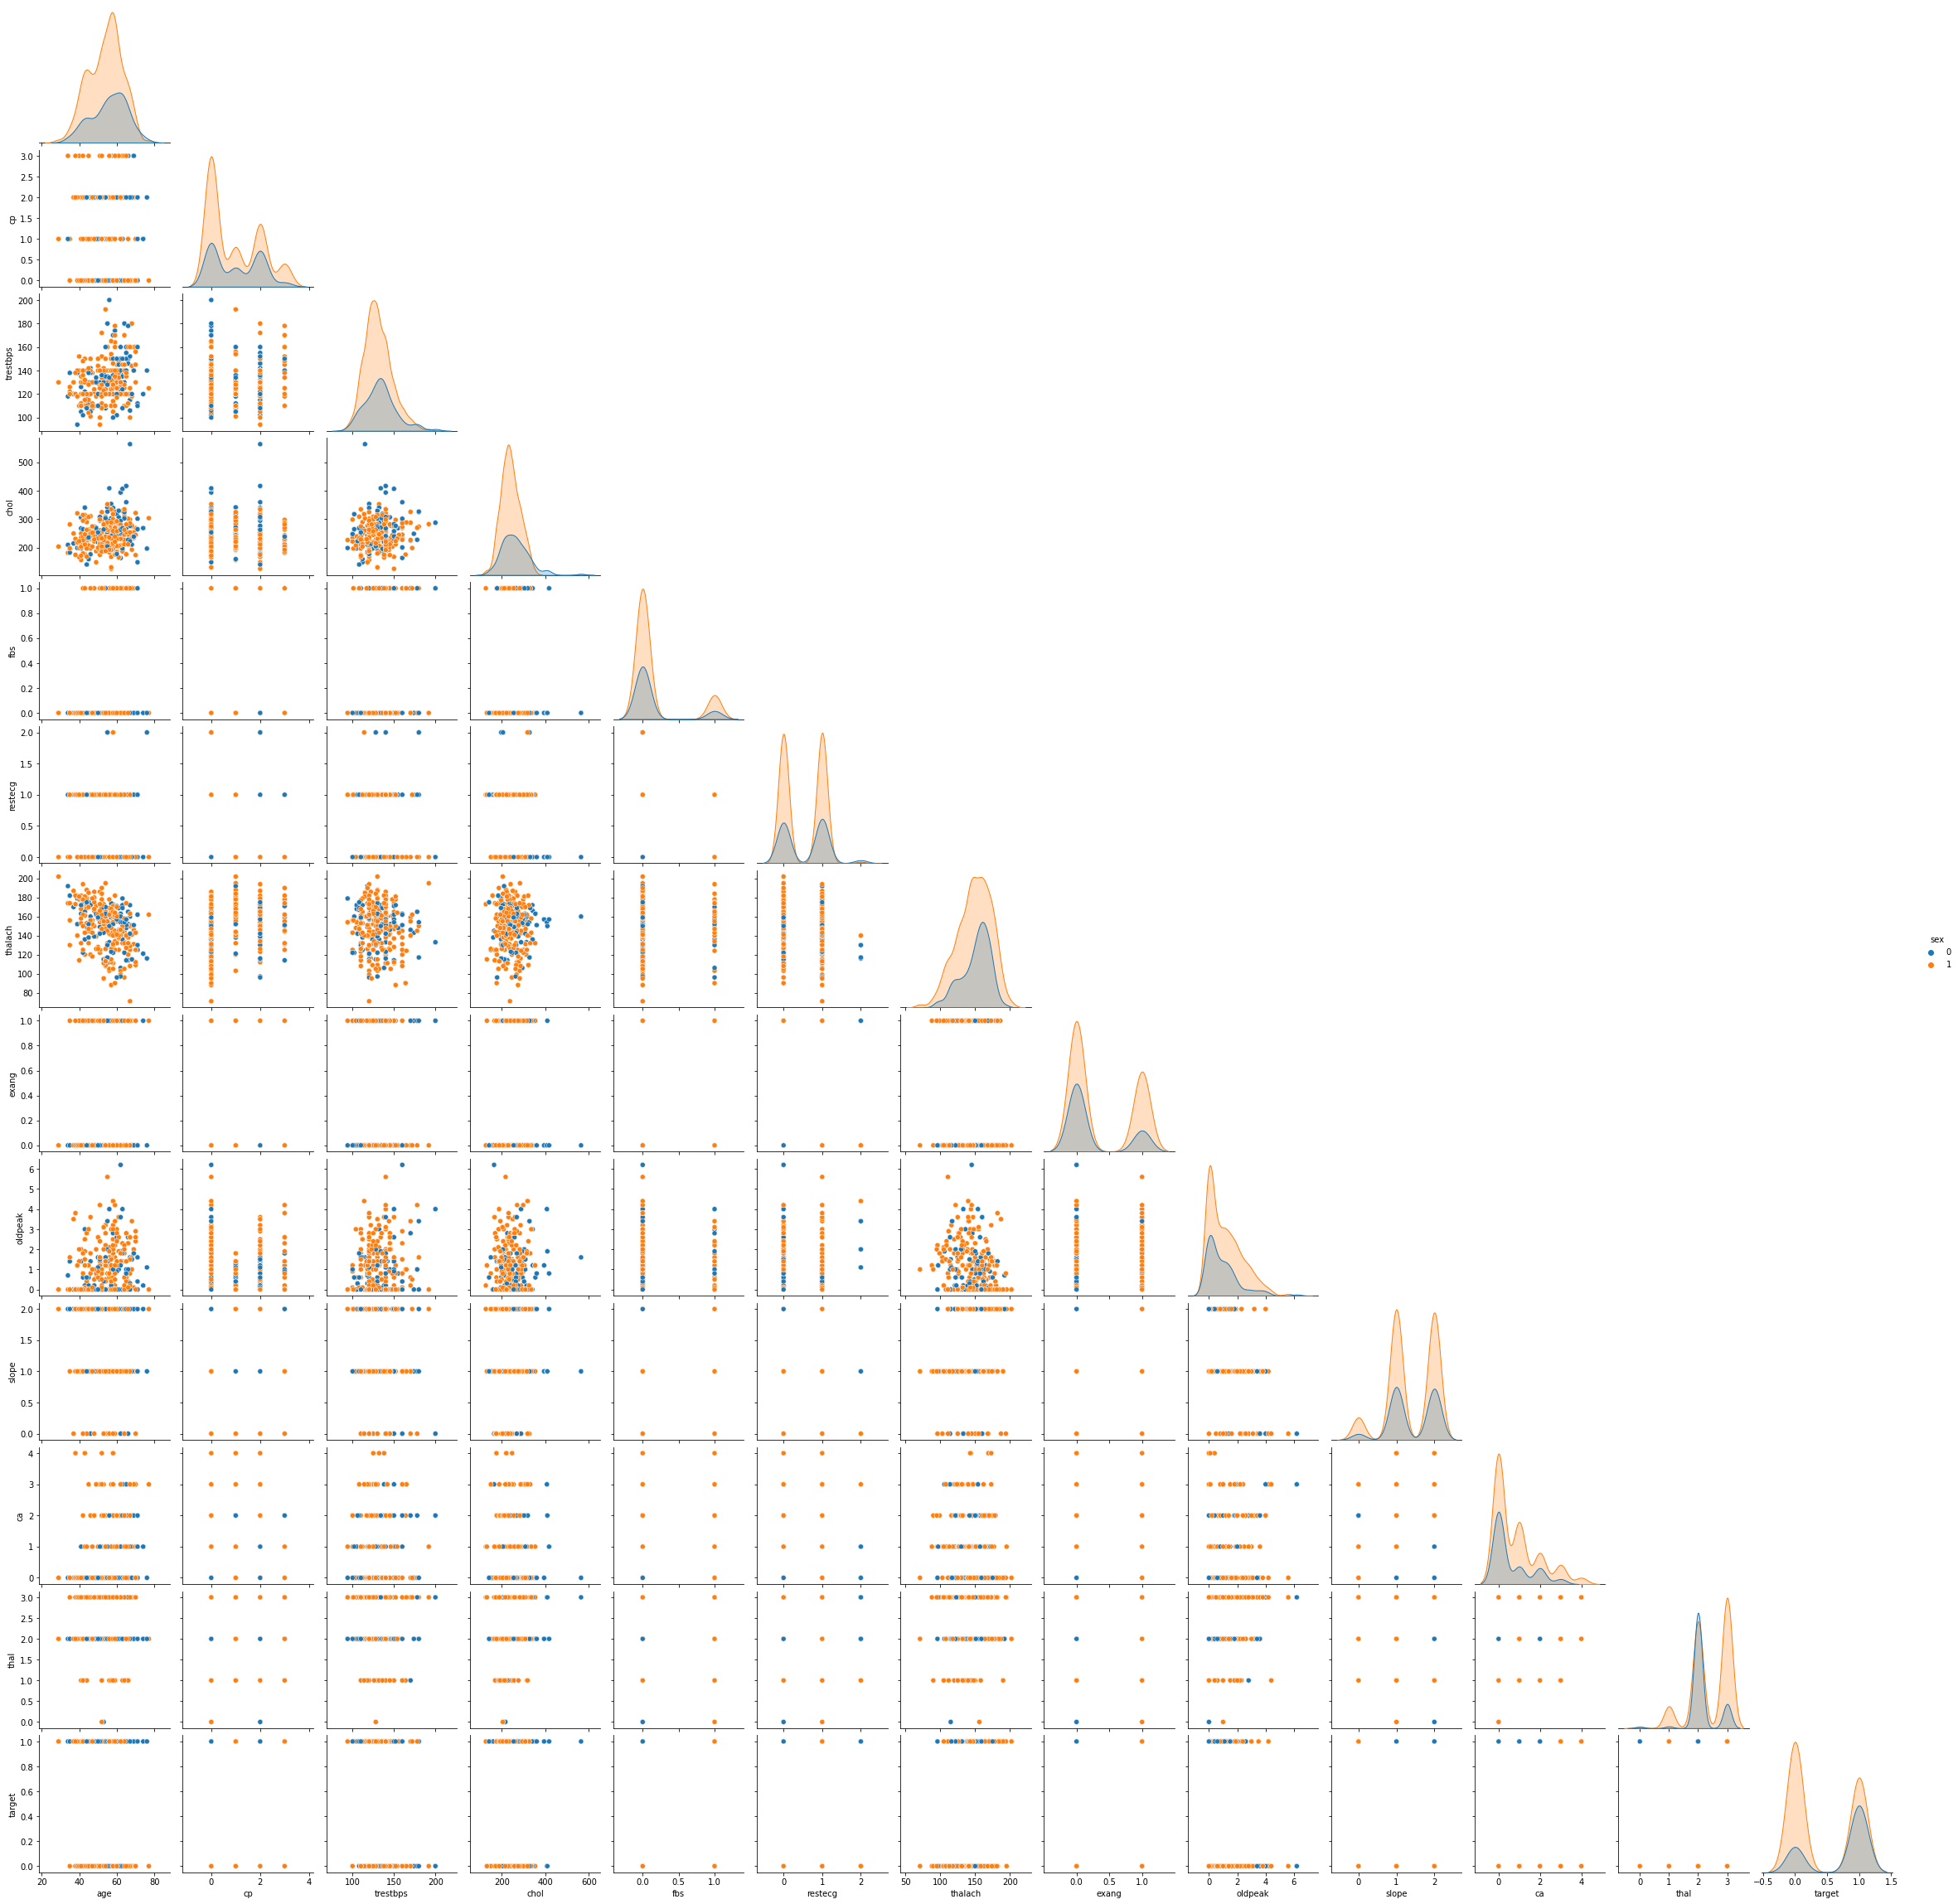

In [10]:
sns.pairplot(df,corner=True,hue='sex')  #pairplot for the given dataset which allows us to plot pairwise relationships between the variales within the dataset.

<AxesSubplot:>

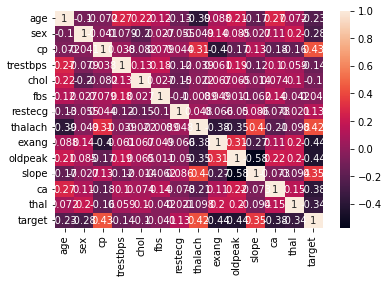

In [11]:
sns.heatmap(df.corr(),annot=True)  #heatmap is a graphical repsentation of data where individual values that are contained in a matrix are presented as colours.

In [12]:
df.target.value_counts()  #it shows the count of both people having heart diseases and not having heart disease.

1    526
0    499
Name: target, dtype: int64

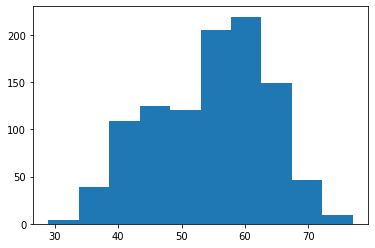

In [13]:
plt.hist(df.age);  #histogram

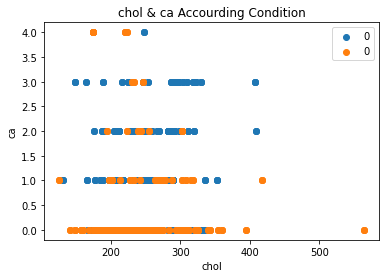

In [14]:
plt.scatter(df.chol[df.target==0],df.ca[df.target==0]) #scatterplot between cholestrol & accourding condition
plt.scatter(df.chol[df.target==1],df.ca[df.target==1])
plt.xlabel("chol")
plt.ylabel("ca")
plt.title("chol & ca Accourding Condition")
plt.legend(df.target)    

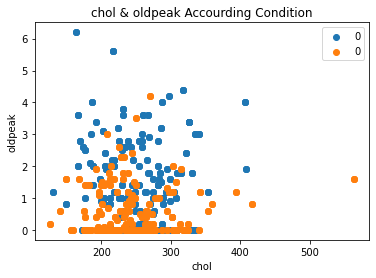

In [15]:
plt.scatter(df.chol[df.target==0],df.oldpeak[df.target==0])   #scatterplot between cholestrol & oldpeak
plt.scatter(df.chol[df.target==1],df.oldpeak[df.target==1])
plt.xlabel("chol")
plt.ylabel("oldpeak")
plt.title("chol & oldpeak Accourding Condition")
plt.legend(df.target)

In [16]:
# Create Column from Cholesterol  
df['cat_chol']=np.asarray(df.chol==0).astype('object')

### PRE - PROCESSING

In [17]:
from sklearn.preprocessing import LabelEncoder,PolynomialFeatures,OrdinalEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

cat=df.select_dtypes('object').columns[:-1].tolist()
cat_trans=Pipeline([('oe',OneHotEncoder(handle_unknown='ignore',drop='first'))])

num=df.select_dtypes(np.number).columns[:-1].tolist()[:-1]
pl_trans=Pipeline(steps=[('pl',PolynomialFeatures(5))])


preprocessor=ColumnTransformer([('cat_trans',cat_trans,cat)])

x=df.drop('target',axis=1)
y=df.target

### BUILDING A MODEL

In [18]:
import warnings
warnings.simplefilter('ignore')

In [19]:
from sklearn.model_selection import train_test_split   #splitting as training(80%) & testing(20%) datasets

x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.2,random_state=6)

for l in x_tr,x_te,y_tr,y_te:
    print(len(l))

820
205
820
205


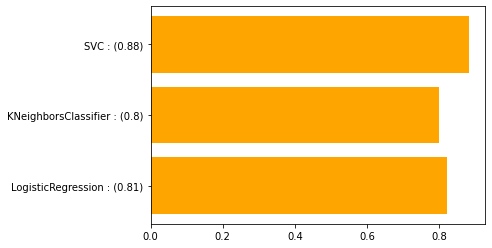

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# load data
data = pd.read_csv('/content/gdrive/MyDrive/heart1234.csv')

# split into X and y
X = data.drop('target', axis=1)
y = data['target']

# split into train and test sets
x_tr, x_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

# define transformers
ohe = OneHotEncoder()
scaler = StandardScaler()

# define preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('cat', ohe, ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']),
    ('num', scaler, ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])])

def df_clfs(x_train=x_tr, y_train=y_tr, x_test=x_te, y_test=y_te,
            classifier=[LogisticRegression(max_iter=1000), KNeighborsClassifier(), SVC()]):
    """
    Function To Create Plot For Score of Classifiers with No Tunning
    """
    b_s={}
    for cl in classifier:
        clf = Pipeline(steps=[('preprocessor', preprocessor), ('clf', cl)])
        clf.fit(x_train, y_train)
        b_s[f"{cl}".split("(")[0]+" : ("+f"{clf.score(x_test,y_test)}"[:4]+")"]=clf.score(x_test,y_test)
    clfs=pd.DataFrame(b_s,index=["Scores"])
    plt.barh(clfs.columns, clfs.loc['Scores'], align="center", color='orange')
    plt.show()

df_clfs()   #showing accuracies in barplot


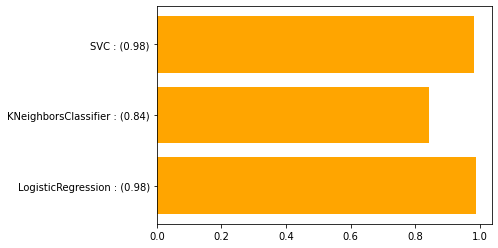

In [22]:
from sklearn.model_selection import cross_val_score

def rec_clfs(x, y, classifier=[LogisticRegression(max_iter=1000), KNeighborsClassifier(), SVC()]):
    """
    Function To Create Plot From Mean Of Cross Validation Scores `Recall` of Classifiers with No Tunning
    """
    b_s = {}
    for cl in classifier:
        clf = Pipeline(steps=[('preprocessor', preprocessor), ('pl_trans', pl_trans), ("clf", cl)])
        val = np.mean(cross_val_score(clf, x, y, scoring="recall"))
        b_s[f"{cl}".split("(")[0] + " : (" + f"{val}"[:4] + ")"] = val
        clfs = pd.DataFrame(b_s, index=["Scores"])
        plt.barh(clfs.columns, clfs.loc['Scores'], align="center", color='orange')
    plt.show()
    
rec_clfs(x, y)


### GOT HIGHEST ACCURACY FOR SVM, SO, IT THE BEST MODEL AMONG THE THREE